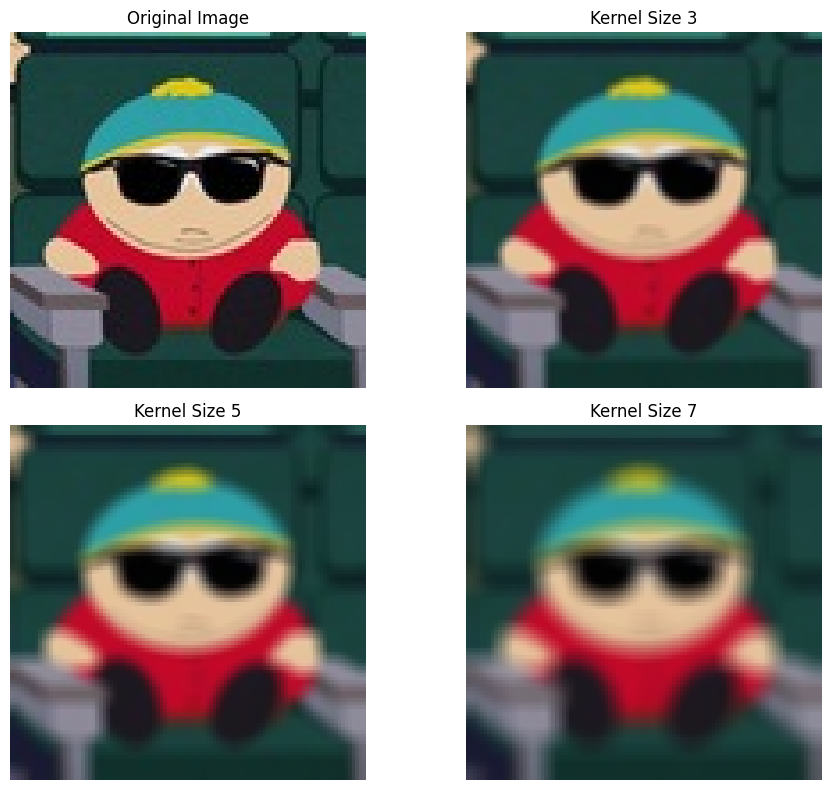

In [8]:
import cv2
import matplotlib.pyplot as plt


def plot_original_and_filtered(original_image, filtered_images, filter_names):
    plt.figure(figsize=(10, 8))

    # Plot the original image in the top-left position
    plt.subplot(221)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Plot the filtered images in the other three positions
    for i, filtered_image in enumerate(filtered_images):
        plt.subplot(222 + i)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(filter_names[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Load the image
image = cv2.imread("low-image.jpg")

# Define different kernel sizes
kernel_sizes = [3, 5, 7]
filtered_images = []

# Apply filtering for each kernel size
for kernel_size in kernel_sizes:
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    filtered_images.append(filtered_image)

# Define filter names
filter_names = [f"Kernel Size {kernel_size}" for kernel_size in kernel_sizes]

# Call the function to plot the original and filtered images in a 2x2 grid
plot_original_and_filtered(image, filtered_images, filter_names)

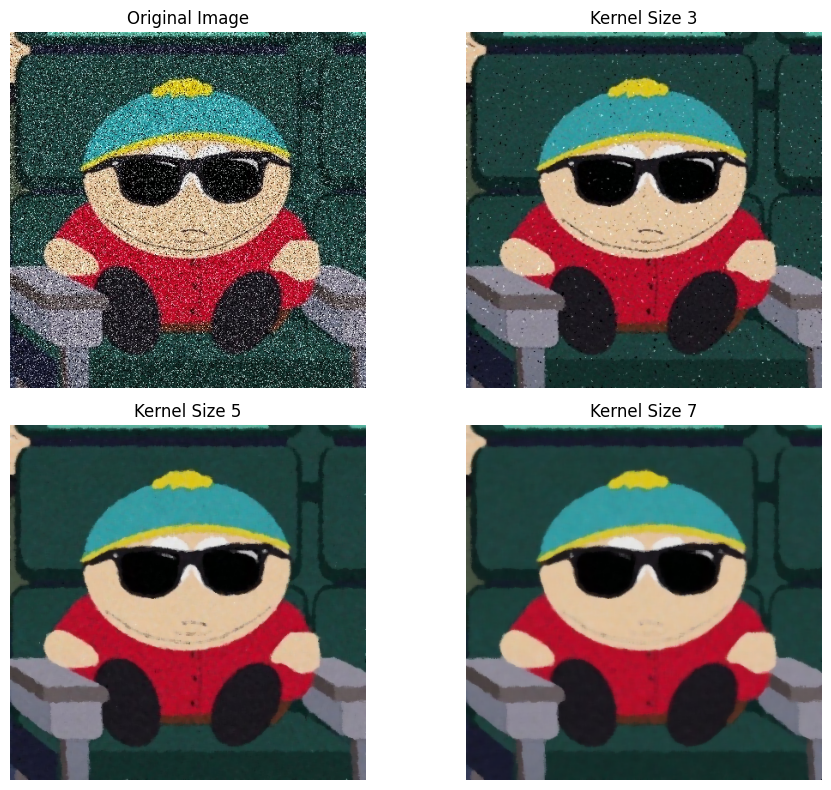

In [9]:
# Load the image
image = cv2.imread("noise-image.jpg")

# Define different kernel sizes
kernel_sizes = [3, 5, 7]
filtered_images = []

# Apply filtering for each kernel size
for kernel_size in kernel_sizes:
    filtered_image = cv2.medianBlur(image, kernel_size)
    filtered_images.append(filtered_image)

# Define filter names
filter_names = [f"Kernel Size {kernel_size}" for kernel_size in kernel_sizes]

# Call the function to plot the original and filtered images in a 2x2 grid
plot_original_and_filtered(image, filtered_images, filter_names)

Original Image Histograms:


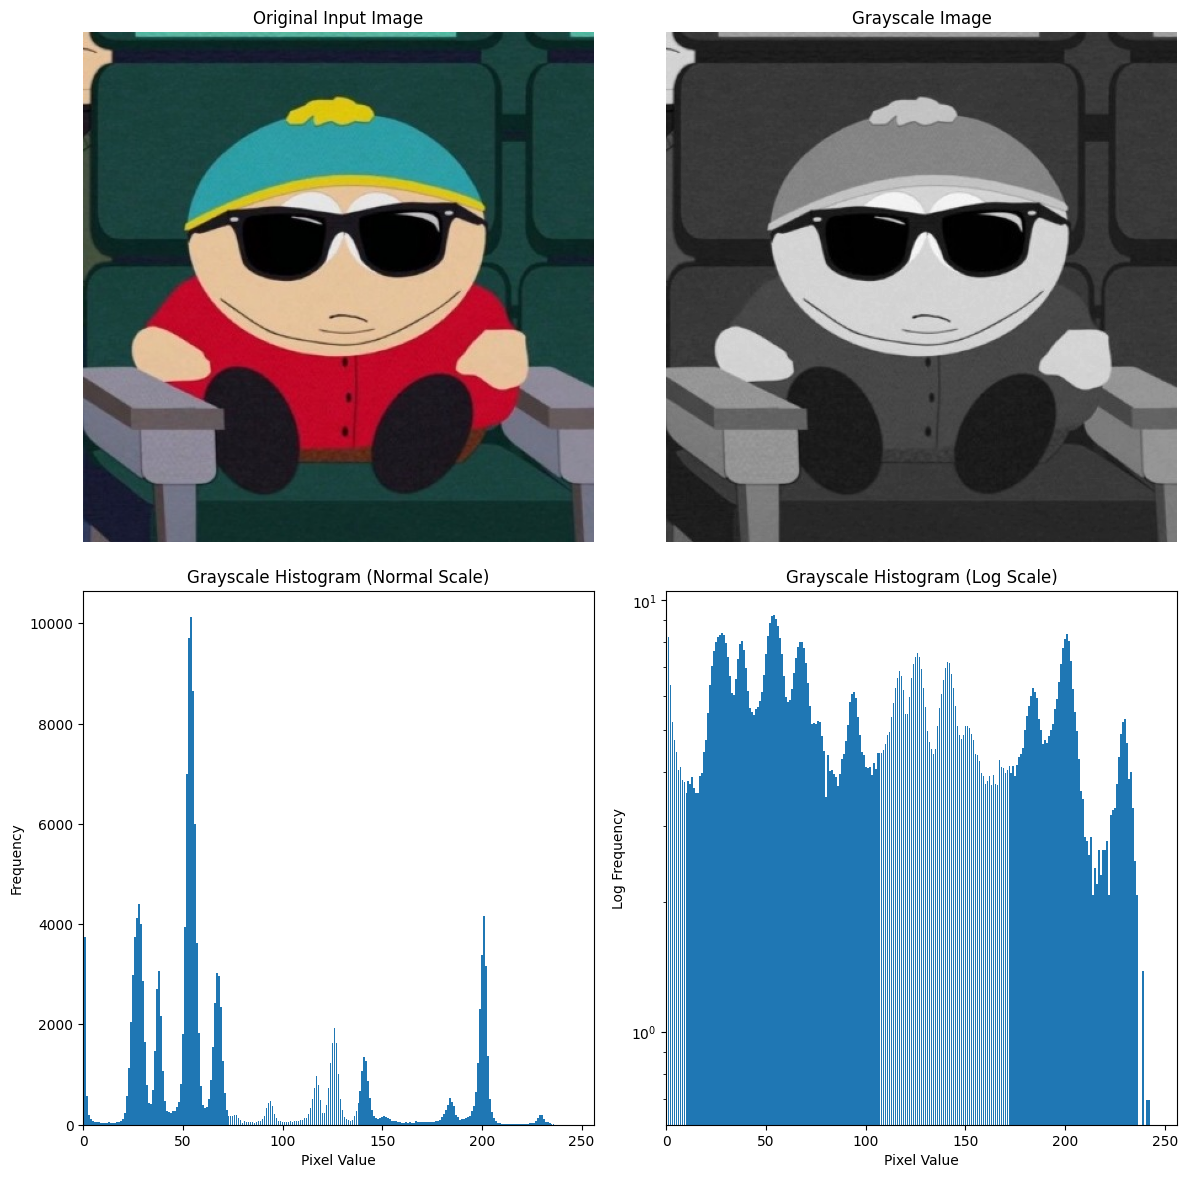

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot_image_histograms(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram using OpenCV
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # Plot the original input image in the top-left subplot
    axs[0, 0].set_title("Original Input Image")
    axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0, 0].axis("off")  # Remove x-axis and y-axis

    # Plot the grayscale image in the top-right subplot
    axs[0, 1].set_title("Grayscale Image")
    axs[0, 1].imshow(gray_image, cmap="gray")
    axs[0, 1].axis("off")  # Remove x-axis and y-axis

    # Plot the histogram as a bar chart in the bottom-left subplot (normal scale)
    axs[1, 0].set_title("Grayscale Histogram (Normal Scale)")
    axs[1, 0].set_xlabel("Pixel Value")
    axs[1, 0].set_ylabel("Frequency")
    axs[1, 0].bar(range(256), hist[:, 0])
    axs[1, 0].set_xlim([0, 256])

    # Calculate the logarithm of the histogram
    hist_log = np.log1p(hist)

    # Plot the histogram as a bar chart in the bottom-right subplot (log scale)
    axs[1, 1].set_title("Grayscale Histogram (Log Scale)")
    axs[1, 1].set_xlabel("Pixel Value")
    axs[1, 1].set_ylabel("Log Frequency")
    axs[1, 1].bar(range(256), hist_log[:, 0])
    axs[1, 1].set_xlim([0, 256])
    axs[1, 1].set_yscale("log")  # Set y-axis to logarithmic scale

    plt.tight_layout()
    plt.show()


# Example usage:
original_image_path = "image.jpg"
original_image = cv2.imread(original_image_path)

# Call the function with the original image
print("Original Image Histograms:")
plot_image_histograms(original_image)

Brightness-Adjusted Image Histograms:


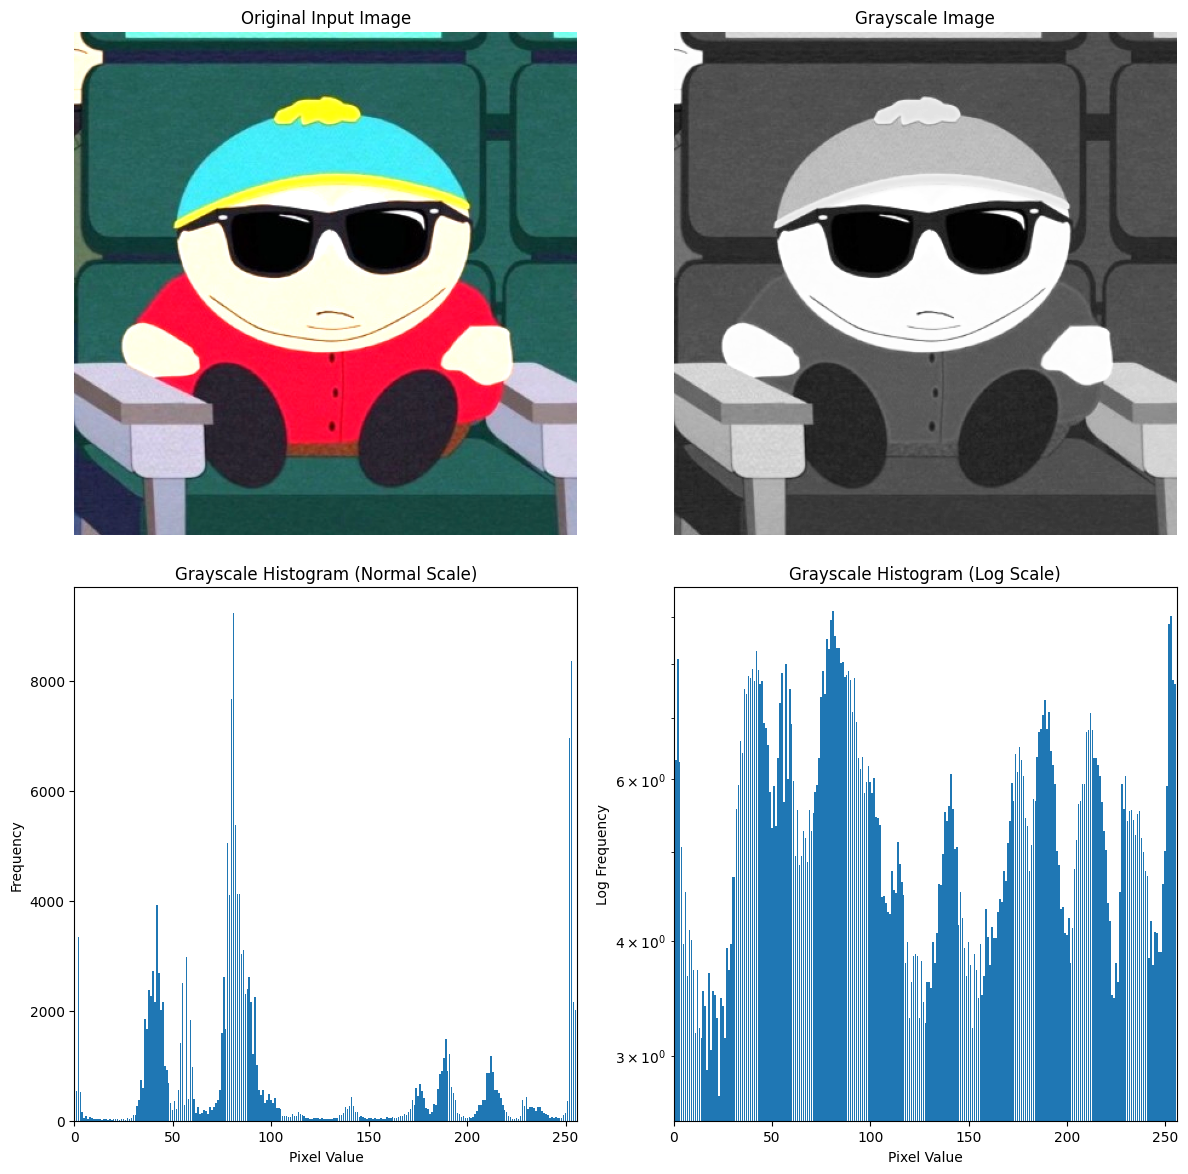

In [11]:
original_image_path = "image.jpg"
original_image = cv2.imread(original_image_path)

# Create a brightness-adjusted image (e.g., increasing brightness)
brightness_factor = (
    1.5  # You can change this value to make the image brighter or darker
)
# Create a copy of the original image to avoid modifying the original
brightness_adjusted_image = original_image.copy()
brightness_adjusted_image = cv2.multiply(
    brightness_adjusted_image, np.array([brightness_factor])
)
brightness_adjusted_image = np.clip(brightness_adjusted_image, 0, 255).astype(np.uint8)

# Call the function with the brightness-adjusted image
print("Brightness-Adjusted Image Histograms:")
plot_image_histograms(brightness_adjusted_image)

Darkened Image Histograms:


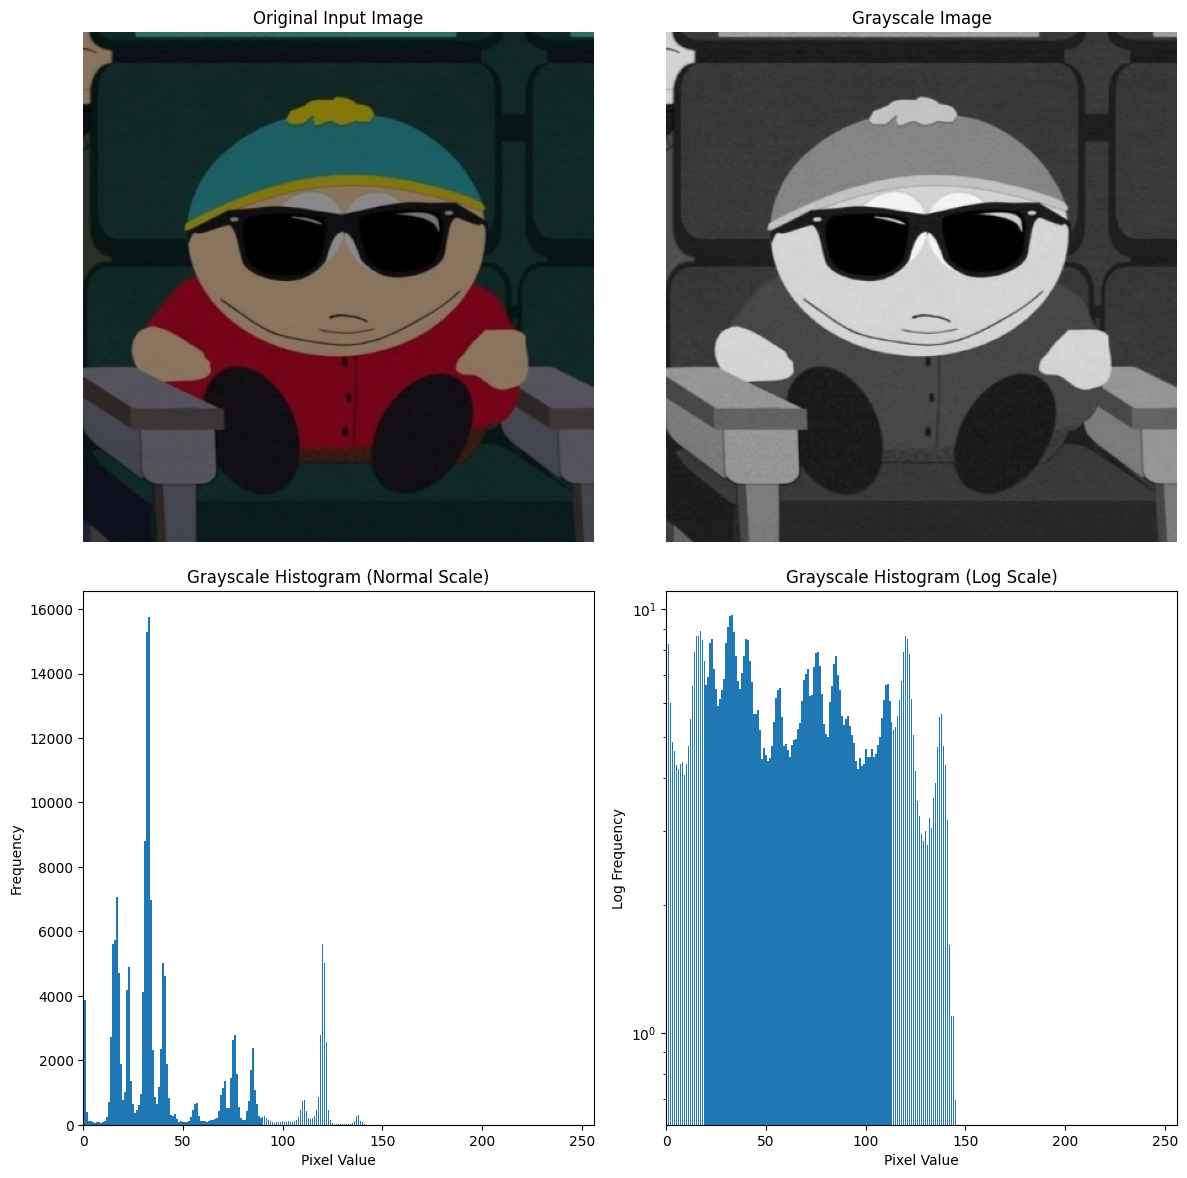

In [12]:
# create a darkened image (e.g., decreasing brightness)
original_image_path = "image.jpg"
original_image = cv2.imread(original_image_path)
darkness_factor = 0.6
darkened_image = cv2.convertScaleAbs(original_image, alpha=darkness_factor, beta=0)

# Call the function with the darkened image
print("Darkened Image Histograms:")
plot_image_histograms(darkened_image)

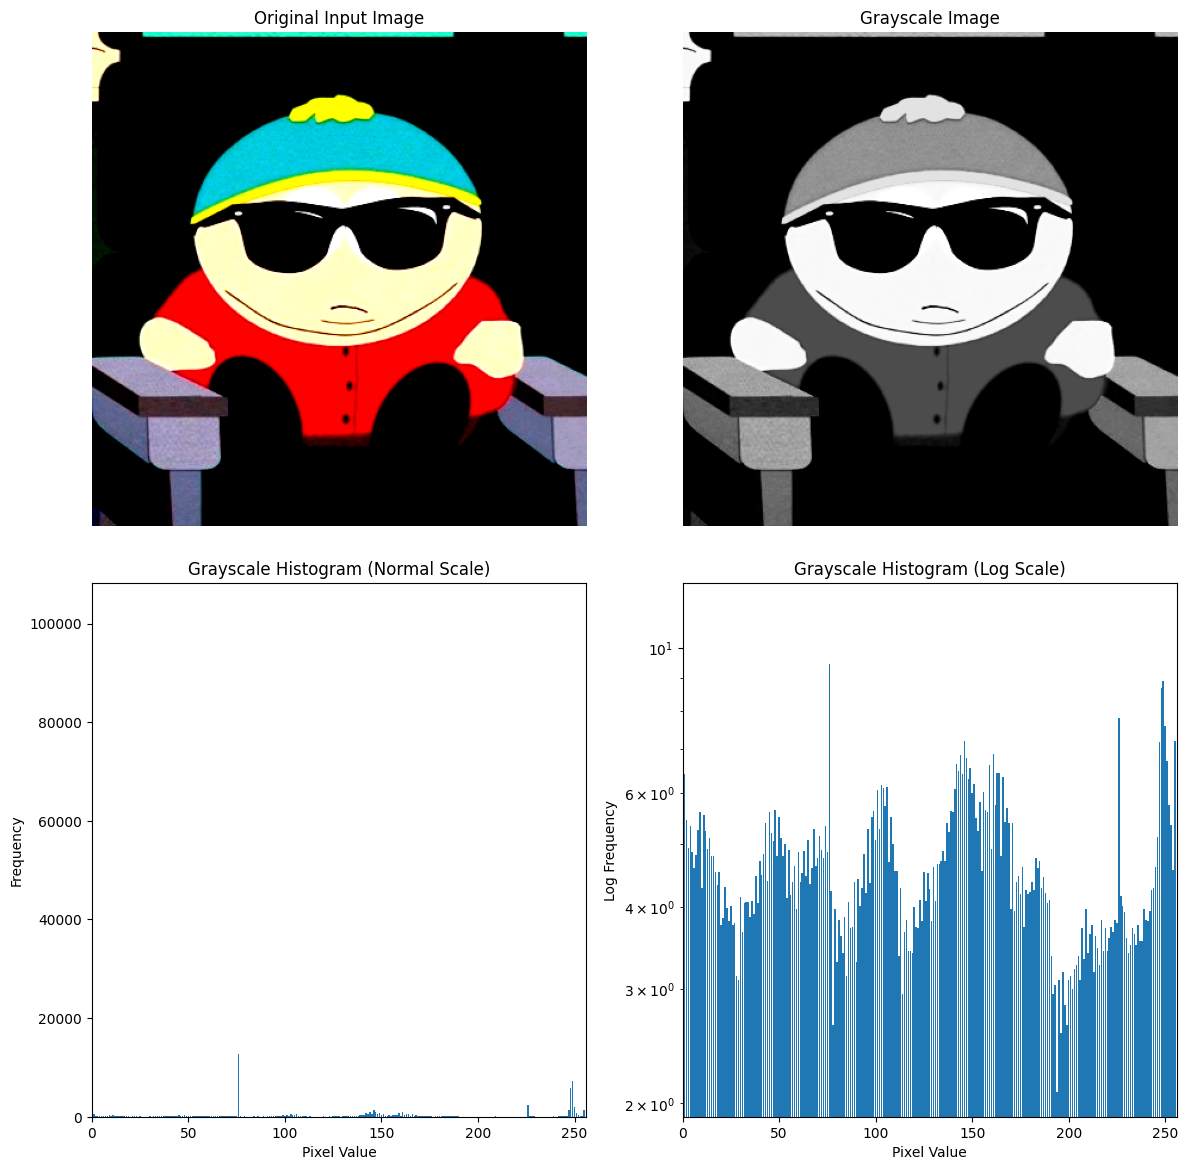

In [13]:
# create a contrast-adjusted image (e.g., increasing contrast)
high_contrast_image_path = "high-contrast.png"
high_contrast_image = cv2.imread(high_contrast_image_path)
plot_image_histograms(high_contrast_image)

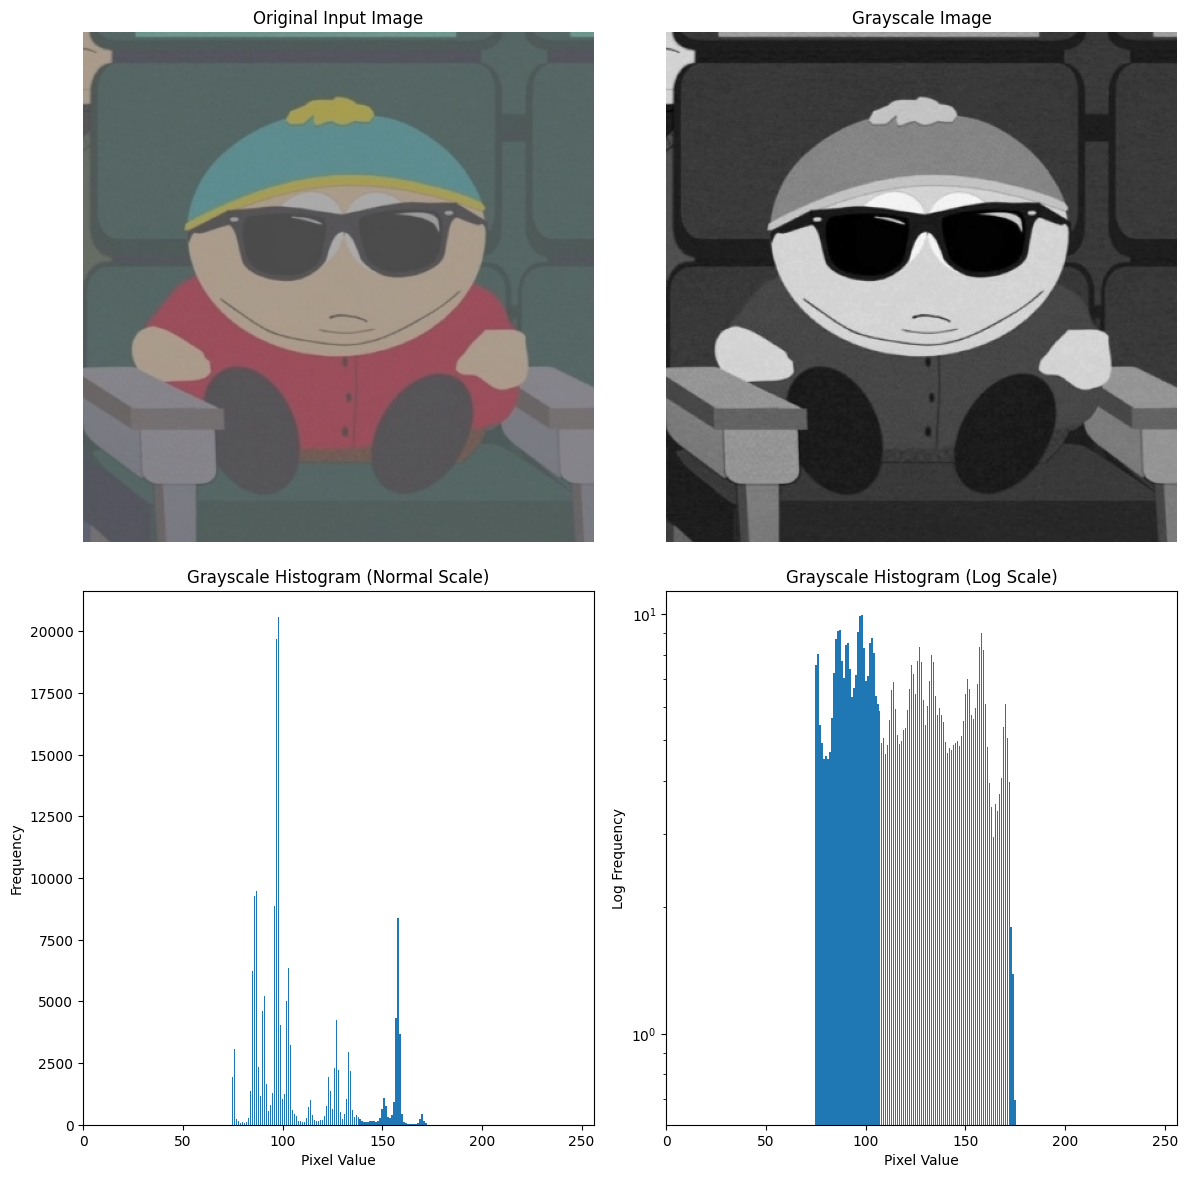

In [14]:
# create a contrast-adjusted image (e.g., increasing contrast)
low_contrast_image_path = "low-contrast.png"
low_contrast_image = cv2.imread(low_contrast_image_path)
plot_image_histograms(low_contrast_image)